In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



In [8]:
#定义SIFT检测算法函数
def detectAndDescribe(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    descriptor=cv2.SIFT_create()
    (kps, features) = descriptor.detectAndCompute(gray, None)       #运用SIFT检测关键点
    kps = np.float32([kp.pt for kp in kps])
    return (kps, features)

In [9]:
def matchKeypoints(kpsA, kpsB, featuresA, featuresB, ratio = 0.75, reprojThresh = 4.0):
    matcher = cv2.BFMatcher()
    rawMatches = matcher.knnMatch(featuresA, featuresB, 2)      #运用KNN算法匹配
    matches = []
    for m in rawMatches:
        if len(m) == 2 and m[0].distance < m[1].distance * ratio:
            matches.append((m[0].trainIdx, m[0].queryIdx))
    if len(matches) > 10:       #匹配关键点的对数必须大于10，才能进行拼接
        ptsA = np.float32([kpsA[i] for (_, i) in matches])
        ptsB = np.float32([kpsB[i] for (i, _) in matches])
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, reprojThresh)      #记录透视矩阵，方便下一步进行透视变换
        return (matches, H, status)
    return None

In [10]:
imageA = cv2.imread('data/1.jpg')
imageB = cv2.imread('data/2.jpg')
#得到关键点
(kpsA, featuresA) = detectAndDescribe(imageA)
(kpsB, featuresB) = detectAndDescribe(imageB)
#进行关键点的匹配并将其拼接
(matches,H,status) = matchKeypoints(kpsA, kpsB, featuresA, featuresB)
H

array([[-5.24726686e-02, -8.47370467e-01,  3.29912608e+03],
       [ 8.44270050e-01,  1.20616089e-01,  2.71896197e+02],
       [-3.44475764e-05,  2.10338515e-05,  1.00000000e+00]])

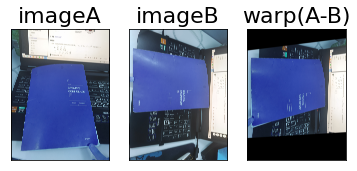

In [26]:
img = cv2.warpPerspective(imageA, H, (imageA.shape[1], imageA.shape[0]))

plt.subplot(1,3,1,xticks = [],yticks=[])
plt.title("imageA",size=22)
plt.imshow(imageA)
plt.subplot(1,3,2,xticks = [],yticks=[])
plt.title("imageB",size=22)
plt.imshow(imageB)
plt.subplot(1,3,3,xticks = [],yticks=[])
plt.title("warp(A-B)",size=22)
plt.imshow(img)
plt.show()